In [1]:
from datetime import datetime as dt
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
df = pd.read_csv("../../../csv/v2/050_gardiner_flow_processed.csv.zip")

In [3]:
df["collectedAt"] = pd.to_datetime(df["collectedAt"], utc=True)
df["collectedAt"] = df.collectedAt.dt.floor(freq="s")
df["year"] = df["collectedAt"].dt.year
df["month"] = df["collectedAt"].dt.month
df["day"] = df["collectedAt"].dt.day
df["hour"] = df["collectedAt"].dt.hour
df["dow"] = df["collectedAt"].dt.day_of_week
df["dow_name"] = df["collectedAt"].dt.day_name()
df["month_name"] = df["collectedAt"].dt.month_name()
df["year_month"] = df["collectedAt"].dt.to_period("M")
df["year_month_day"] = df["collectedAt"].dt.to_period("D")

/tmp/ipykernel_39955/3366148013.py:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["year_month"] = df["collectedAt"].dt.to_period("M")
/tmp/ipykernel_39955/3366148013.py:11: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["year_month_day"] = df["collectedAt"].dt.to_period("D")


In [4]:
list(df["month_name"].drop_duplicates())

['July',
 'August',
 'September',
 'October',
 'November',
 'December',
 'January',
 'February',
 'March']

# Date & time

## Span

In [5]:
df = df.sort_values(by="collectedAt")
df

,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,roadClosure,coordinates,collectedAt,year,month,day,hour,dow,dow_name,month_name,year_month,year_month_day
0,94,94,297,297,False,"[{'latitude': 43.681009250673604, 'longitude':...",2022-07-14 12:45:00+00:00,2022,7,14,12,3,Thursday,July,2022-07,2022-07-14
1,94,94,297,297,False,"[{'latitude': 43.681009250673604, 'longitude':...",2022-07-14 12:51:44+00:00,2022,7,14,12,3,Thursday,July,2022-07,2022-07-14
2,75,93,372,300,False,"[{'latitude': 43.681009250673604, 'longitude':...",2022-07-14 12:55:27+00:00,2022,7,14,12,3,Thursday,July,2022-07,2022-07-14
3,72,94,388,297,False,"[{'latitude': 43.681009250673604, 'longitude':...",2022-07-14 13:00:00+00:00,2022,7,14,13,3,Thursday,July,2022-07,2022-07-14
4,94,94,297,297,False,"[{'latitude': 43.681009250673604, 'longitude':...",2022-07-14 13:05:00+00:00,2022,7,14,13,3,Thursday,July,2022-07,2022-07-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73530,92,92,303,303,False,"[{'latitude': 43.681009250673604, 'longitude':...",2023-03-26 21:35:00+00:00,2023,3,26,21,6,Sunday,March,2023-03,2023-03-26
73531,92,92,303,303,False,"[{'latitude': 43.681009250673604, 'longitude':...",2023-03-26 21:40:00+00:00,2023,3,26,21,6,Sunday,March,2023-03,2023-03-26
73532,79,93,353,300,False,"[{'latitude': 43.681009250673604, 'longitude':...",2023-03-26 21:45:00+00:00,2023,3,26,21,6,Sunday,March,2023-03,2023-03-26
73533,92,92,303,303,False,"[{'latitude': 43.681009250673604, 'longitude':...",2023-03-26 21:50:00+00:00,2023,3,26,21,6,Sunday,March,2023-03,2023-03-26


## Readings per day

In [6]:
readings_per_day = df.groupby(["year", "month", "day"]).count().reset_index()
readings_per_day["date"] = readings_per_day.apply(lambda x: dt.strptime(f"{x.year}-{x.month}-{x.day}", "%Y-%m-%d"), axis=1)

In [7]:
readings_per_day.head()

,year,month,day,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,roadClosure,coordinates,collectedAt,hour,dow,dow_name,month_name,year_month,year_month_day,date
0,2022,7,14,135,135,135,135,135,135,135,135,135,135,135,135,135,2022-07-14
1,2022,7,15,287,287,287,287,287,287,287,287,287,287,287,287,287,2022-07-15
2,2022,7,16,288,288,288,288,288,288,288,288,288,288,288,288,288,2022-07-16
3,2022,7,17,288,288,288,288,288,288,288,288,288,288,288,288,288,2022-07-17
4,2022,7,18,288,288,288,288,288,288,288,288,288,288,288,288,288,2022-07-18


In [8]:
print("Total days:", len(readings_per_day))

Total days: 256


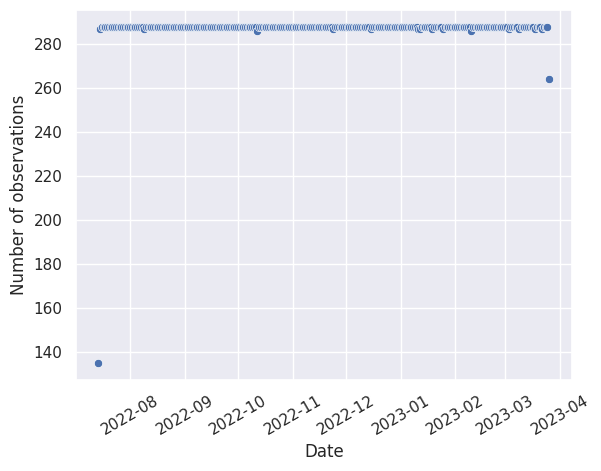

In [9]:
ax = sns.scatterplot(data=readings_per_day,x="date",y="currentSpeed")
ax.set(xlabel="Date",ylabel="Number of observations")
plt.xticks(rotation=30)
plt.savefig("./plots/000_number_of_readings_per_day.eps", format="eps", bbox_inches="tight")
plt.savefig("./plots/000_number_of_readings_per_day.png", bbox_inches="tight")

### For most days, there were 288 data points collected

## Readings per month

In [10]:
readings_per_month = df.groupby(["year","month_name"]).count().reset_index()[["month_name","currentSpeed"]]
readings_per_month = readings_per_month.rename(columns={"currentSpeed":"readings"})

In [11]:
readings_per_month

,month_name,readings
0,August,8927
1,December,8927
2,July,5030
3,November,8639
4,October,8926
5,September,8640
6,February,8062
7,January,8924
8,March,7460


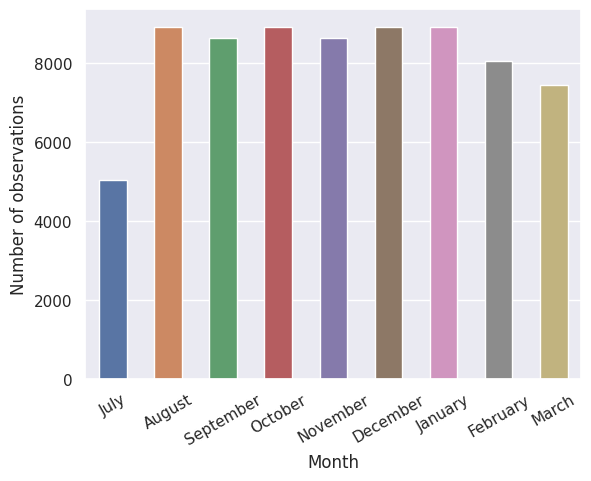

In [12]:
ax = sns.barplot(data=readings_per_month,x="month_name",y="readings", order=list(df["month_name"].drop_duplicates()),width=0.5)
ax.set(xlabel="Month",ylabel="Number of observations")
plt.xticks(rotation=30)
plt.savefig("./plots/000_number_of_readings_per_month.eps", format="eps", bbox_inches="tight")
plt.savefig("./plots/000_number_of_readings_per_month.png", bbox_inches="tight")

### July has less data because I started collecting on the 14th at 12:45PM

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


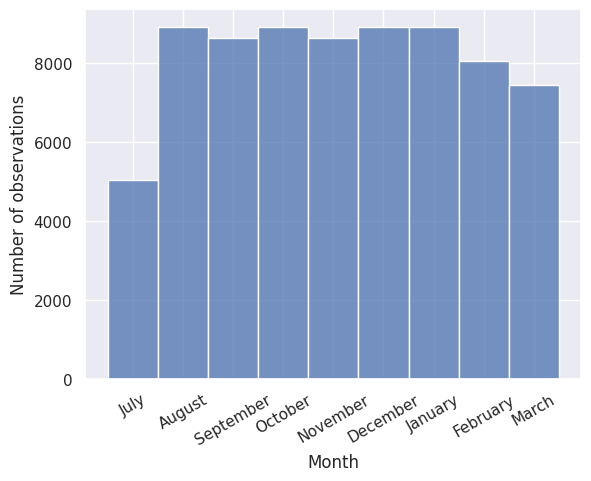

In [13]:
ax = sns.histplot(data=df, x="month_name")
ax.set(ylabel="Number of observations")
ax.set(xlabel="Month")
plt.xticks(rotation=30)
plt.savefig("./plots/000_hist_num_readings_per_month.eps", format="eps", bbox_inches="tight")
plt.savefig("./plots/000_hist_num_readings_per_month.png", bbox_inches="tight")
plt.savefig("./plots/000_hist_num_readings_per_month.pdf", bbox_inches="tight")